In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
df = pd.read_csv('../datasets/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [3]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [4]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [5]:
df['2018'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900.0
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900.0
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600.0
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000.0
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800.0


## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

In [7]:
df['2018']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900.0
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900.0
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600.0
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000.0
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800.0
...,...,...,...,...,...,...
2018-12-24,148.149994,151.550003,146.589996,146.830002,144.656540,37169200.0
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.843475,58582500.0
2018-12-27,155.839996,156.770004,150.070007,156.149994,153.838562,53117100.0


You can also filter by month:

In [8]:
df['2019-03']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,174.279999,175.149994,172.889999,174.970001,173.119278,25886200.0
2019-03-04,175.690002,177.750000,173.970001,175.850006,173.989990,27436200.0
2019-03-05,175.940002,176.000000,174.539993,175.529999,173.673370,19737400.0
2019-03-06,174.669998,175.490005,173.940002,174.520004,172.674057,20810400.0
2019-03-07,173.869995,174.440002,172.020004,172.500000,170.675415,24796400.0
2019-03-08,170.320007,173.070007,169.500000,172.910004,171.081085,23999400.0
2019-03-11,175.490005,179.119995,175.350006,178.899994,177.007706,32011000.0
2019-03-12,180.000000,182.669998,179.369995,180.910004,178.996475,32467600.0
2019-03-13,182.250000,183.300003,180.919998,181.710007,179.787994,31032500.0


## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [9]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.544299,0.545845,0.543613,0.543613,0.431748,2.586252e+07
1981-01-31,0.567071,0.568346,0.565264,0.565264,0.448944,7.249867e+06
1981-02-28,0.472862,0.474506,0.471570,0.471570,0.374530,4.231832e+06
1981-03-31,0.445312,0.446733,0.443486,0.443486,0.352226,7.962691e+06
1981-04-30,0.487245,0.488733,0.486182,0.486182,0.386135,6.392000e+06
...,...,...,...,...,...,...
2019-08-31,205.262274,207.609546,202.849545,204.957728,204.137486,3.095794e+07
2019-09-30,217.727499,219.471001,215.939500,217.994999,217.342478,2.712836e+07
2019-10-31,234.929565,236.969131,232.945218,235.286521,234.582242,2.644794e+07


In [10]:
df['2019-04'].mean()

Open         1.998667e+02
High         2.015771e+02
Low          1.986310e+02
Close        2.005162e+02
Adj Close    1.983953e+02
Volume       2.410084e+07
dtype: float64

## Lookup challenge
---

Where can you find all the resample options?

## "Rolling" Functions
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [12]:
df.rolling(2).mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.501116,0.502232,0.500000,0.500000,0.39711,80614800.0
1980-12-16,0.470982,0.470982,0.468750,0.468750,0.37229,35201600.0
1980-12-17,0.457589,0.458705,0.456473,0.456473,0.36254,24021200.0
1980-12-18,0.468750,0.470982,0.468750,0.468750,0.37229,19986400.0


## Challenge
---

Concatenate the `Close` column with the 3 day rolling mean of the `Close` column.

In [13]:
pd.concat([
    df[['Close']],
    df[['Close']].rolling(3).mean().rename(columns={'Close': 'Close 3 Day Avg'})
], axis=1).head()

,Close,Close 3 Day Avg
Date,,
1980-12-12,0.513393,NaN
1980-12-15,0.486607,NaN
1980-12-16,0.450893,0.483631
1980-12-17,0.462054,0.466518
1980-12-18,0.475446,0.462798


## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

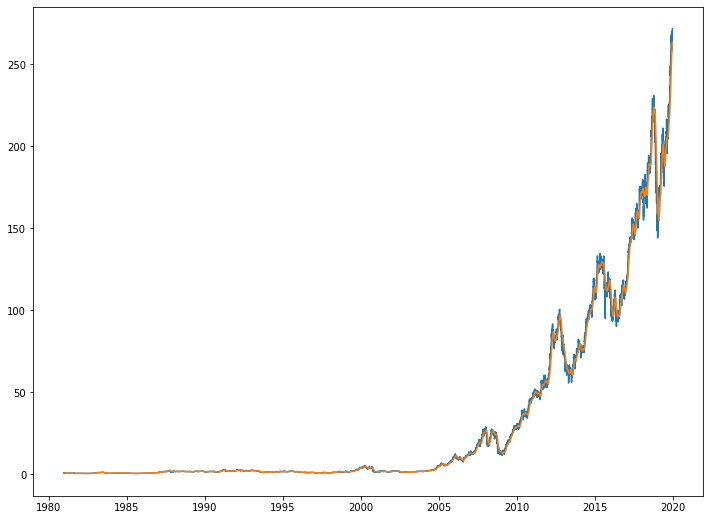

In [24]:
plt.figure(figsize=(12,9))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [15]:
df.diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,-0.024554,-0.026786,-0.026786,-0.026786,-0.021274,-73287200.0
1980-12-16,-0.035714,-0.035714,-0.035714,-0.035714,-0.028365,-17539200.0
1980-12-17,0.008929,0.011161,0.011161,0.011161,0.008864,-4821600.0
1980-12-18,0.013392,0.013393,0.013392,0.013392,0.010637,-3248000.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [16]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,-0.047827,-0.051949,-0.052174,-0.052174,-0.052175,-0.625006
1980-12-16,-0.073059,-0.073059,-0.073394,-0.073394,-0.073395,-0.398879
1980-12-17,0.019705,0.024631,0.024753,0.024753,0.024752,-0.182415
1980-12-18,0.028984,0.028846,0.028984,0.028984,0.028986,-0.150298


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff? Is this good or bad?

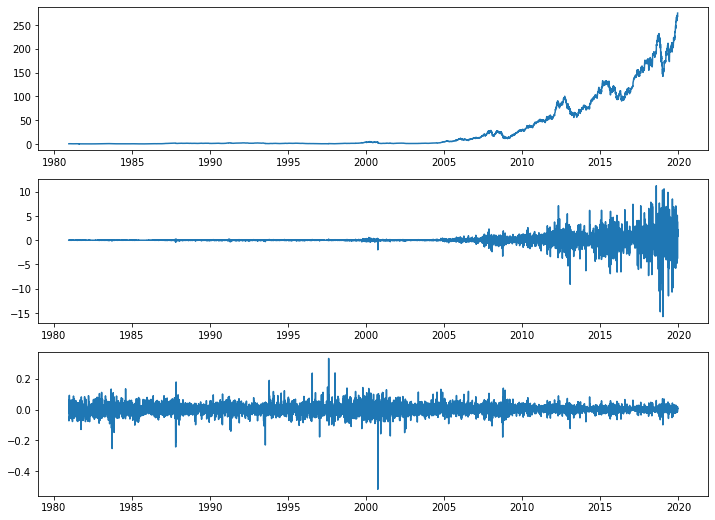

In [17]:
fig, axes = plt.subplots(nrows=3, figsize=(12,9))
axes[0].plot(df.Close)
axes[1].plot(df.Close.diff())
axes[2].plot(df.Close.pct_change())

## Volatility
---

The volatility for AAPL can be thought of as the standard deviation of the returns (`.pct_change()`). We can use the `.rolling()` method to see how AAPL's volatility changes over time.

In the cell below, plot the 10 day rolling standard deviation of APPL's returns for `Close` (**THAT'S A MOUTHFUL!**)

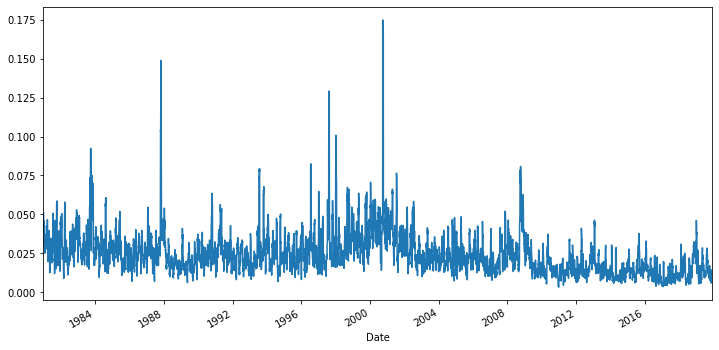

In [18]:
plt.figure(figsize=(12,6))
df.Close.pct_change().rolling(10).std().plot()

## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [20]:
df.shift().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1980-12-16,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
1980-12-17,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
1980-12-18,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

In [21]:
pd.concat([
    df[['Close']].rename(columns={'Close': 'y'}),
    df[['Close']].shift().rename(columns={'Close': 'prev_close'}),
    df[['Open']].rename(columns={'Open': 'open'})
], axis=1).head()

,y,prev_close,open
Date,,,
1980-12-12,0.513393,NaN,0.513393
1980-12-15,0.486607,0.513393,0.488839
1980-12-16,0.450893,0.486607,0.453125
1980-12-17,0.462054,0.450893,0.462054
1980-12-18,0.475446,0.462054,0.475446
